## Implementing SVM

In [31]:
 from sklearn.datasets import load_breast_cancer 
cancer_data = load_breast_cancer() 
X = cancer_data.data
Y = cancer_data.target 
print('Input data size:', X.shape)

Input data size: (569, 30)


In [32]:
print('Output data size :', Y.shape)

Output data size : (569,)


In [33]:
print('Label names:', cancer_data.target_names)

Label names: ['malignant' 'benign']


In [34]:
n_pos = (Y == 1).sum() 
n_neg = (Y == 0).sum() 
print(f'{n_pos} positive samples and {n_neg} negative samples.')

357 positive samples and 212 negative samples.


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [36]:
from sklearn.svm import  SVC 
clf = SVC(kernel='linear', C=1.0, random_state=42)

In [37]:
clf.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [38]:
accuracy = clf.score(X_test, Y_test)
print(f'The accuracy is: {accuracy*100:.1f}%')

The accuracy is: 95.8%


## Multiclass Cases in Scikit-learn

In [39]:
from sklearn.datasets import load_wine 
wine_data = load_wine()
X = wine_data.data 
Y = wine_data.target 
print('Input data size :', X.shape)

Input data size : (178, 13)


In [40]:
print('Output data size :', Y.shape)

Output data size : (178,)


In [41]:
print('Label names:', wine_data.target_names)

Label names: ['class_0' 'class_1' 'class_2']


In [42]:
n_class0 = (Y == 0).sum()
n_class1 = (Y == 1).sum() 
n_class2 = (Y == 2).sum()
print(f'{n_class0}, class0 samples,\n{n_class1} class1 samples,\n{n_class2} class2 samples.')

59, class0 samples,
71 class1 samples,
48 class2 samples.


#### Splitting the data into training and testing sets:

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [44]:
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

#### Obtaining the prediction accuracy by using the testing set with the trained model directly:

In [45]:
accuracy = clf.score(X_test, Y_test)
print(f'The accuracy is: {accuracy*100:.1f}%')

The accuracy is: 97.8%


### Checking how the model performs for individual classes

In [46]:
from sklearn.metrics import classification_report
pred = clf.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Solving linearly non-separable problems with kernels

In [48]:
import numpy as np 
import matplotlib.pyplot as dude 
X = np.c_[# negative class 
          (.3, -.8),
          (-1.5, -1),
          (-1.3, -.8),
          (-1.1, -1.3),
          (-1.2, -.3),
          (-1.3, -.5),
          (-.6, 1.1),
          (-1.4, 2.2),
          (1, 1),
          # positive class
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [-1] * 8 + [1] * 8

In [49]:
gamma_option = [1, 2, 4]

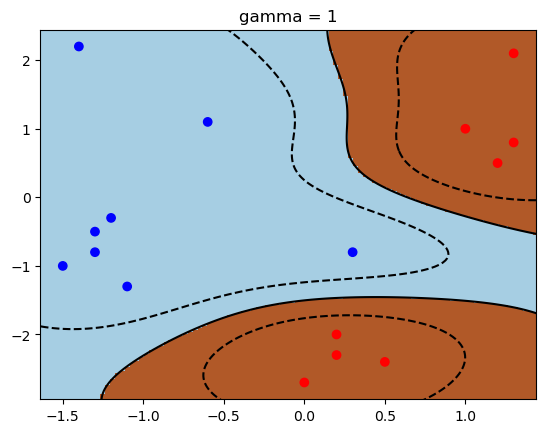

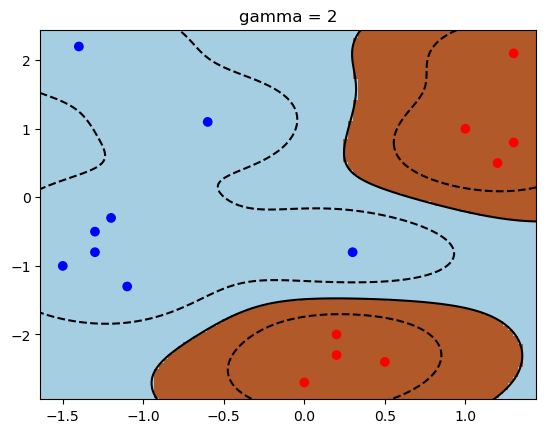

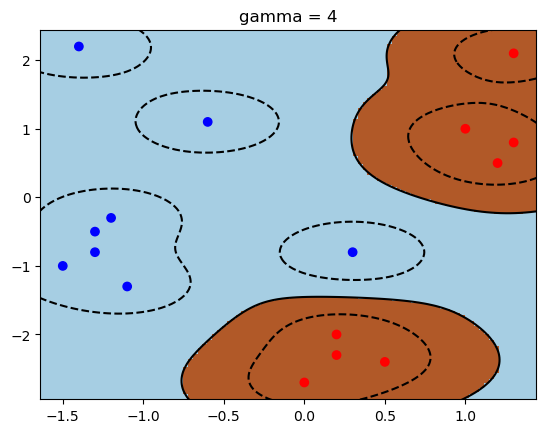

In [54]:
for i, gamma in enumerate(gamma_option, 1):
    svm = SVC(kernel='rbf', gamma=gamma)
    svm.fit(X, Y) 
    dude.scatter(X[:, 0],X[:, 1], c=['b']*8+['r']*8, zorder=10)
    dude.axis('tight') 
    XX, YY = np.mgrid[-3:3:200j, -3:3:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    dude.pcolormesh(XX, YY, Z > 0, cmap=dude.cm.Paired)
    dude.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    dude.title('gamma = %d'  % gamma)
    dude.show()